# Clustering Music Genres using Python

In this project, I will cluster songs using data from Spotify. I will utilize K-Means Clustering and Yellowbrick (specifically the Elbow Method) to visualize the data and determine the optimal number of clusters. Unlike classification and regression, clustering does not involve a dependent variable ("y"); instead, it relies solely on independent variables ("x"). In clustering, a target column such as "cluster" is created to assign each data point to a specific cluster.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [2]:
df=pd.read_csv('Spotify-2000.csv')

In [3]:
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59


In [4]:
df2=df.drop(["Index","Title","Artist","Top Genre"],axis=1)

In [5]:
df2.head()

,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
0,2004,157,30,53,-14,11,68,201,94,3,71
1,2000,135,79,50,-11,17,81,207,17,7,39
2,2001,168,69,66,-9,7,52,341,2,17,69
3,2007,173,96,43,-4,3,37,269,0,4,76
4,2002,106,82,58,-5,10,87,256,1,3,59


In [6]:
df2["age"]=2024-df2["Year"]

In [7]:
df2=df2.drop(["Year"],axis=1)
df2

,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,age
0,157,30,53,-14,11,68,201,94,3,71,20
1,135,79,50,-11,17,81,207,17,7,39,24
2,168,69,66,-9,7,52,341,2,17,69,23
3,173,96,43,-4,3,37,269,0,4,76,17
4,106,82,58,-5,10,87,256,1,3,59,22
...,...,...,...,...,...,...,...,...,...,...,...
1989,94,21,70,-12,11,72,128,84,7,63,66
1990,175,76,36,-8,76,95,136,73,6,69,66
1991,168,80,53,-9,31,97,162,74,7,74,65
1992,174,26,45,-13,7,60,324,54,4,65,65


In [8]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Beats Per Minute (BPM)  1994 non-null   int64 
 1   Energy                  1994 non-null   int64 
 2   Danceability            1994 non-null   int64 
 3   Loudness (dB)           1994 non-null   int64 
 4   Liveness                1994 non-null   int64 
 5   Valence                 1994 non-null   int64 
 6   Length (Duration)       1994 non-null   object
 7   Acousticness            1994 non-null   int64 
 8   Speechiness             1994 non-null   int64 
 9   Popularity              1994 non-null   int64 
 10  age                     1994 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 171.5+ KB


In [9]:
df2["Length (Duration)"]=df2["Length (Duration)"].str.replace(",","").astype(int)

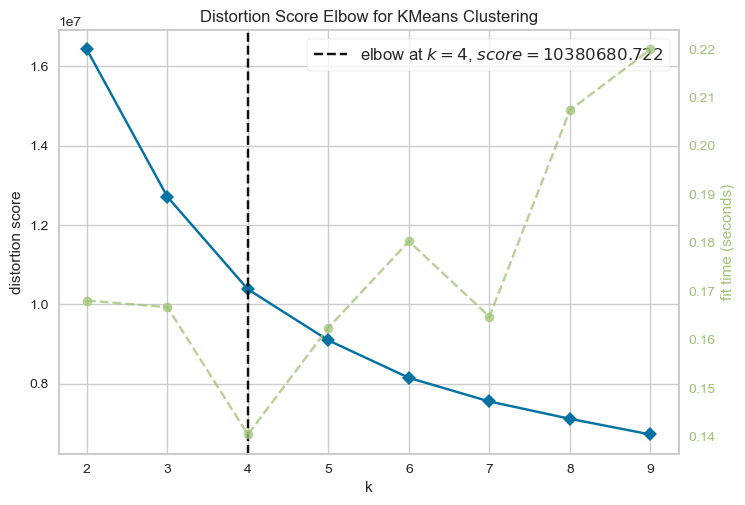

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
km=KMeans()
vis=KElbowVisualizer(km,k=(2,10))
vis.fit(df2)
vis.show()

In [11]:
from sklearn.preprocessing import normalize

In [12]:
x=normalize(df2)
x=pd.DataFrame(x,columns=df2.columns)

In [13]:
model=KMeans(n_clusters=4)

In [14]:
model=model.fit(df2)

In [15]:
prediction=model.predict(df2)
prediction

array([1, 1, 2, ..., 1, 2, 1], dtype=int32)

In [16]:
df["cluster"]=prediction
df.head()

,Index,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity,cluster
0,1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,1
1,2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,1
2,3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,2
3,4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,2
4,5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,2


In [17]:
from sklearn.metrics import silhouette_score
silhouette_score(df2,prediction)

0.2221144352819779

<Axes: xlabel='cluster', ylabel='count'>

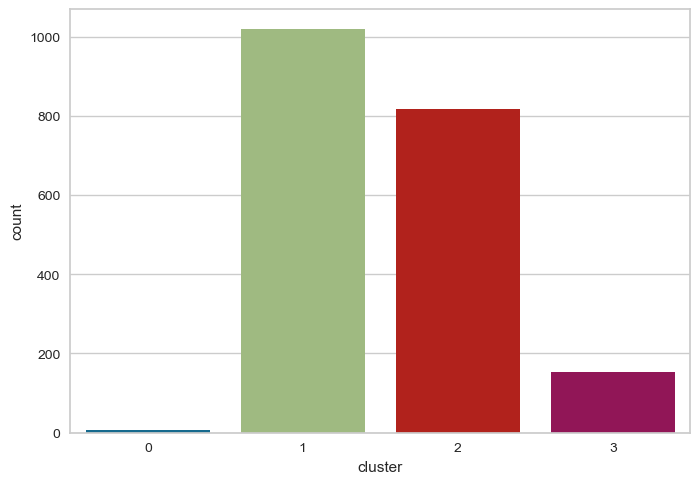

In [18]:
sns.countplot(x="cluster",data=df)

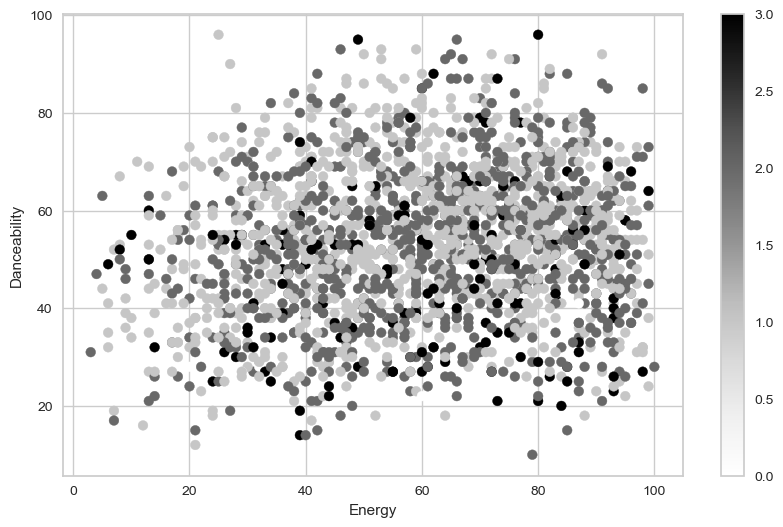

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.scatter(df["Energy"],df["Danceability"], c=prediction)
plt.colorbar()
plt.xlabel("Energy")
plt.ylabel("Danceability");

In that project I made a segmentation of music genres. I think that clustering algorithms make understanding of differences of datas easier. I find interesting that this algorithms can make that in a few seconds.